In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
!pip install pandas

In [4]:
!pip install seaborn

In [5]:
!pip install scikit-learn

In [9]:
import numpy as np
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2,:2]])
target = raw_df.values[1::2,2]

In [10]:
raw_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8


In [13]:
feature_names = ['CRIM','ZN','INDUS','CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX','PTRATIO', 'B','LSTAT']
df = pd.DataFrame(data, columns=feature_names)
df["TARGET"] = target
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


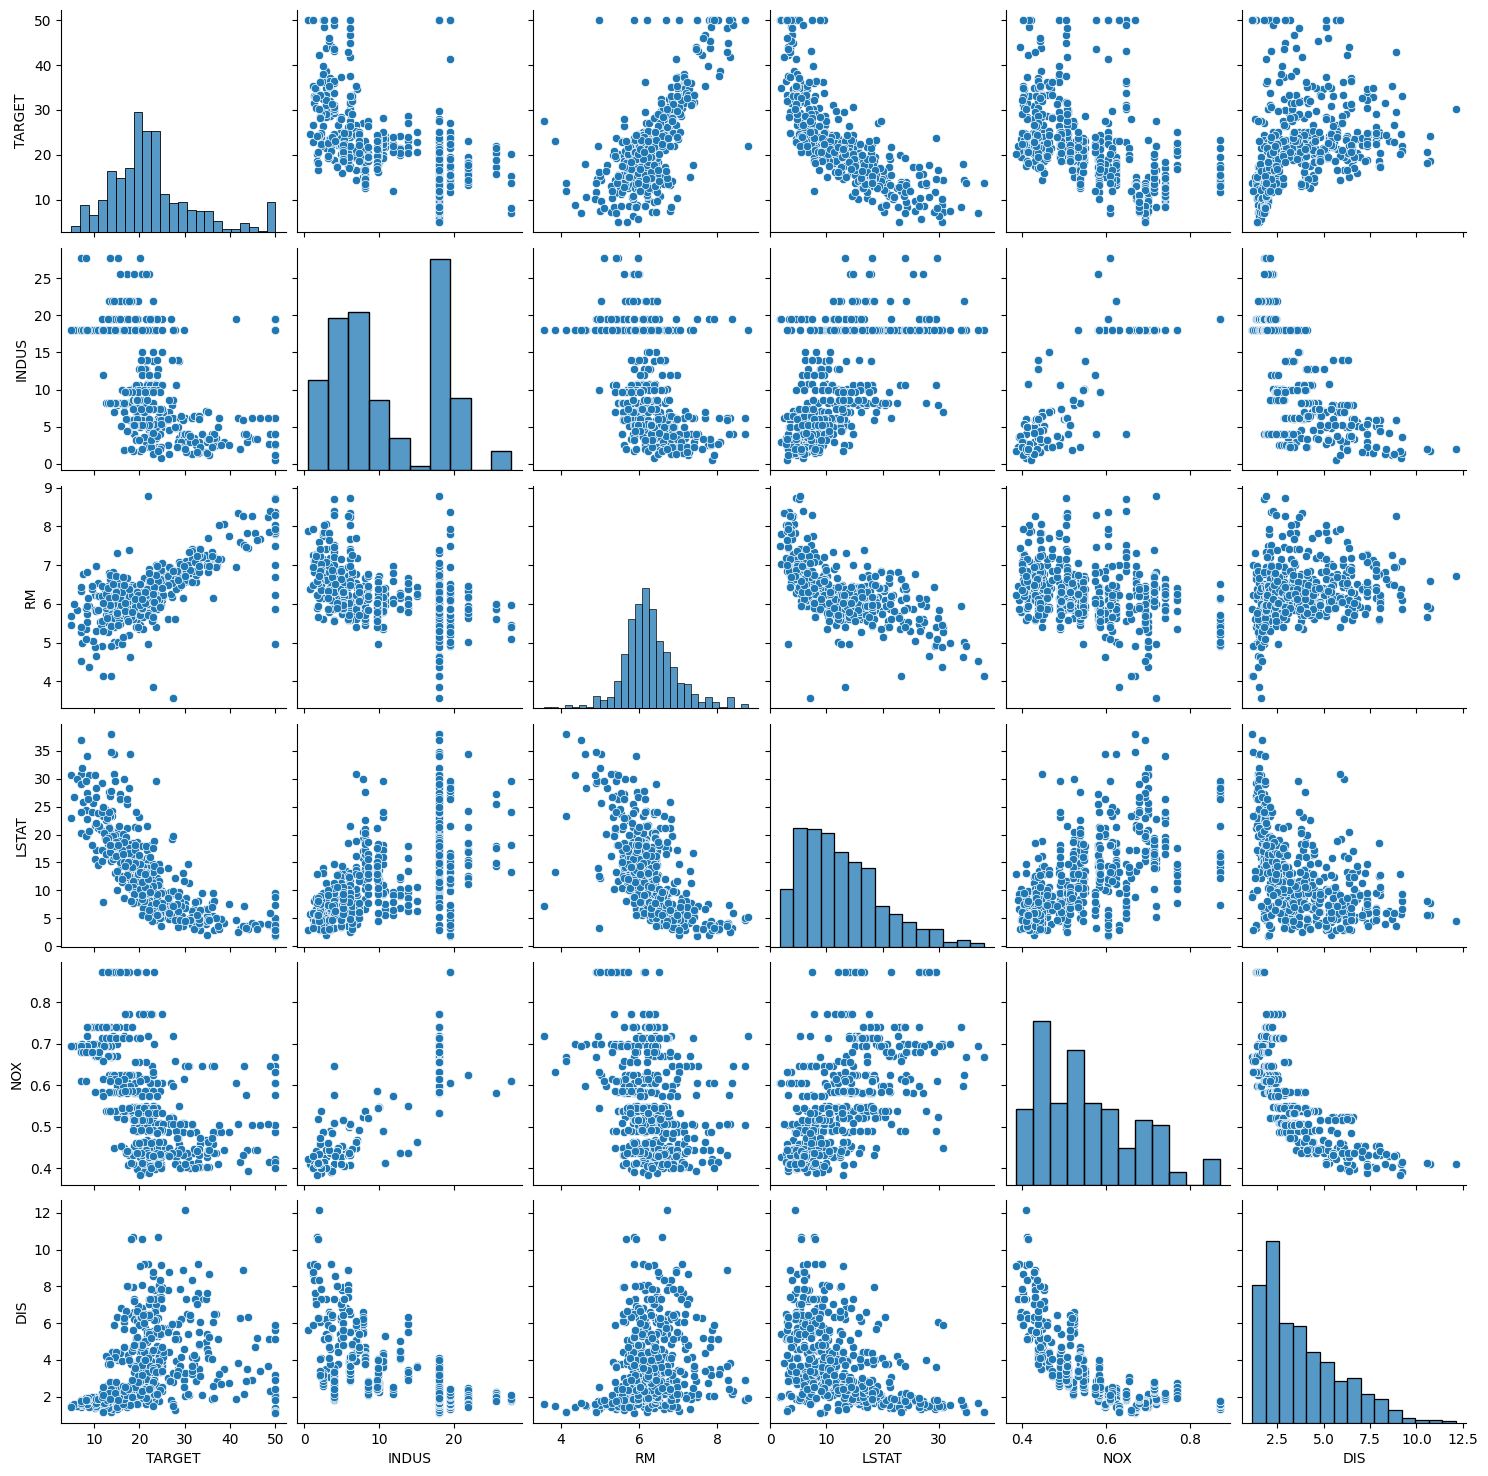

In [15]:
cols = ['TARGET', 'INDUS','RM','LSTAT', 'NOX', 'DIS']
sns.pairplot(df[cols])
plt.show()

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [18]:
# 데이터 준비
data = torch.from_numpy(df[cols].values).float() # 넘파이 배열을 파이토치의 텐서로 변환
data.shape # 506개의 데이터 샘플이 있고 6개의 특징을 가지고 있음

torch.Size([506, 6])

In [21]:
# 입력 데이터, 목표 값
y = data[:,:1] # 출력 m=1 (target)
x = data[:,1:] # 입력 n=5 (target을 제외한 나머지 열(특징들))
print(x.shape, y.shape)

torch.Size([506, 5]) torch.Size([506, 1])


In [22]:
# 하이퍼파라미터 설정
n_epoch = 2000
learning_rate = 1e-3
print_interval = 100 # 손실 값을 출력하는 간격
# 에폭을 2000번 수행하고 100번에 한번씩 손실 값 출력

In [24]:
# 모델 정의
model = nn.Linear(x.size(-1), y.size(-1))
print(model)

Linear(in_features=5, out_features=1, bias=True)


In [26]:
# 최적화 설정
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [27]:
for i in range(n_epoch):
    y_hat = model(x) # forward(x) 함수 내부적으로 호출
    loss = F.mse_loss(y_hat, y)

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

    if(i+1) % print_interval == 0:
        print('Epoch: %d: loss=%.4e' %(i+1, loss))

Epoch: 100: loss=4.2657e+01
Epoch: 200: loss=3.6626e+01
Epoch: 300: loss=3.3298e+01
Epoch: 400: loss=3.1422e+01
Epoch: 500: loss=3.0365e+01
Epoch: 600: loss=2.9768e+01
Epoch: 700: loss=2.9432e+01
Epoch: 800: loss=2.9242e+01
Epoch: 900: loss=2.9135e+01
Epoch: 1000: loss=2.9074e+01
Epoch: 1100: loss=2.9039e+01
Epoch: 1200: loss=2.9020e+01
Epoch: 1300: loss=2.9008e+01
Epoch: 1400: loss=2.9001e+01
Epoch: 1500: loss=2.8997e+01
Epoch: 1600: loss=2.8994e+01
Epoch: 1700: loss=2.8993e+01
Epoch: 1800: loss=2.8991e+01
Epoch: 1900: loss=2.8990e+01
Epoch: 2000: loss=2.8989e+01


/var/folders/dc/3dqm8vys2qv2c52_q3sn76xr0000gn/T/ipykernel_77506/2763197904.py:11: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/autograd/generated/python_variable_methods.cpp:836.)
  print('Epoch: %d: loss=%.4e' %(i+1, loss))
